# Decision Tree for Regression

The process of solving regression problem with decision tree using Scikit Learn.However for regression we use DecisionTreeRegressor class of the tree library. We will use this dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

Now let's apply our decision tree algorithm on this data to try and predict the gas consumption from this data.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

# Importing the Dataset

In [2]:
data = pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Data Analysis

Shape Functions shows the number of rows and columns in that dataset

In [3]:
print('Shape of the Dataset-->',data.shape)

Shape of the Dataset--> (48, 5)


The output will show "(48,5)", which means that our dataset has 48 records and 5 attributes.

Printing the column indexes of the dataset

In [4]:
print ('Columns names -->',data.columns)

Columns names --> Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')


datatypes of the column features

In [5]:
print ('Columns Datatype -->', data.dtypes)

Columns Datatype --> Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object


Checking weather there are any null values in that feature and there count

In [6]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

Using visualization check the null values in the dataset

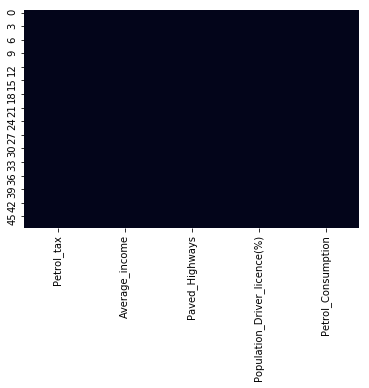

In [7]:
sns.heatmap(data.isnull(), cbar=False)

Describing the entire datas mean,std,min,max of all the features in that data

In [8]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Entire information of the data columns,type,memory usage.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


The correlation matrix of the dataset features

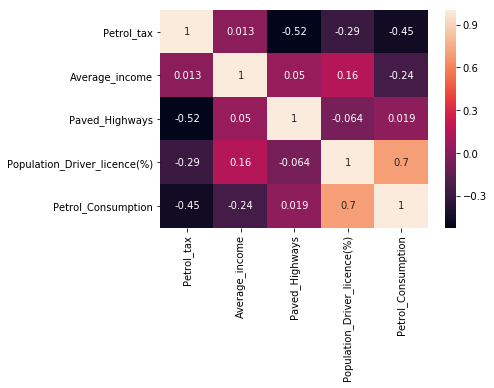

In [10]:
correlation_matrix = data.corr()
sns.heatmap(data=correlation_matrix, annot=True)

Plotting Predictors Vs Target variable

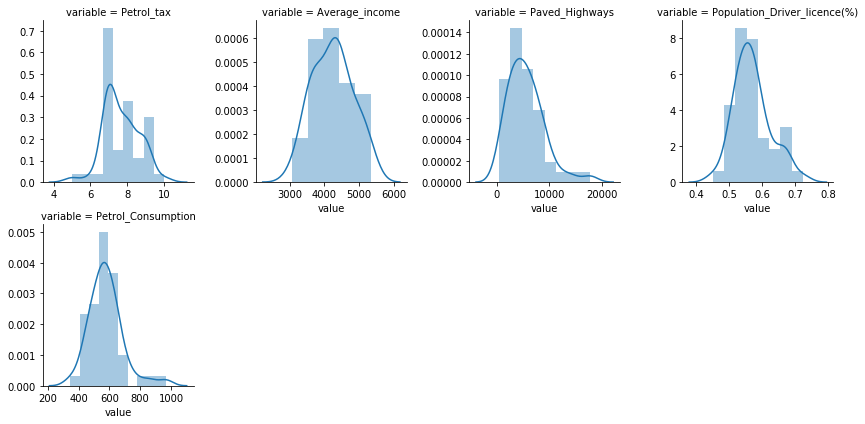

In [11]:
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

# Observations:

We Observe that we have less percent contribution from outliers in the data and we can ignore as the size of dataset is less

# Outliers Values

In [12]:
#percentile of each Predictors
data.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0.01,5.470,3189.90,511.37,0.46792,375.02
0.05,6.727,3388.85,1279.05,0.49825,429.05
0.10,7.000,3558.10,1859.00,0.51240,462.80
0.15,7.000,3635.25,2304.45,0.51835,467.20
0.25,7.000,3739.00,3110.25,0.52975,509.50
0.50,7.500,4298.00,4735.50,0.56450,568.50
0.80,8.500,4776.60,8029.00,0.60600,640.00
0.85,9.000,4895.65,8507.95,0.62585,647.80
0.90,9.000,5039.20,9280.90,0.66300,700.50
0.95,9.000,5183.85,11333.20,0.67200,758.20


#  Visualizing Data with Pairs Plots

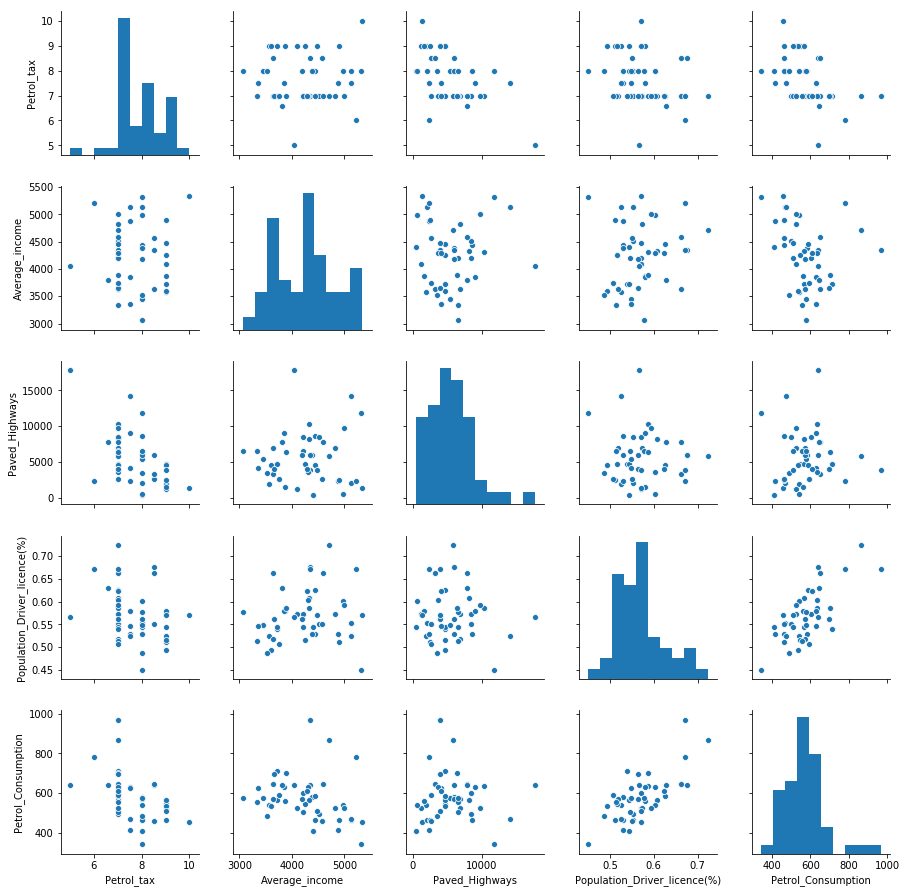

In [13]:
sns.pairplot(data)
plt.show()

# Preparing the Data

As with the Regression task, in this section we will divide our data into attributes and labels and consequently into training and test sets.

Execute the following commands to divide data into labels and attributes:

In [14]:
predictors=data.drop("Petrol_Consumption", axis=1)
response=data['Petrol_Consumption']

Here the predictors variable contains all the columns from the dataset, except 'Petrol_Consumption' column, which is the label. The response variable contains values from the 'Petrol_Consumption' column, which means that the predictors variable contains the attribute set and response variable contains the corresponding labels.

Execute the following code to divide our data into training and test sets:

In [442]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.20, random_state=764) 

# Training and Making Predictions

As mentioned earlier, for a regression task we'll use a different sklearn class than we did for the regression task. The class we'll be using here is the DecisionTreeRegressor class, as opposed to the DecisionTreeClassifier from before.

To train the tree, we'll instantiate the DecisionTreeRegressor class and call the fit method:

In [443]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=2)

In [444]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

To make predictions on the test set, ues the predict method:

In [445]:
predictions = tree.predict(X_test)

In [446]:
predictions[:5]

array([590.84, 487.8 , 487.8 , 487.8 , 487.8 ])

In [447]:
y_test[:5]

43    591
11    471
5     457
24    460
7     467
Name: Petrol_Consumption, dtype: int64

Now let's compare some of our predicted values with the actual values and see how accurate we were

In [448]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})  
df  

,Actual,Predicted
43,591,590.84
11,471,487.80
5,457,487.80
24,460,487.80
7,467,487.80
35,644,590.84
40,587,487.80
36,640,590.84
44,782,916.50
8,464,487.80


Remember that in your case the records compared may be different, depending upon the training and testing split. Since the train_test_split method randomly splits the data we likely won't have the same training and test sets.

# Evaluating the Algorithm

To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The Scikit-Learn library contains functions that can help calculate these values for us. To do so, use this code from the metrics package:

In [449]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 45.617999999999995
Mean Squared Error: 3617.6406799999995
Root Mean Squared Error: 60.14682601767112


In [450]:
print('r2-score',metrics.r2_score(y_test, predictions))

r2-score 0.67316805690946


First,we import graphviz from sklearn for tree diagram, we export the tree output to a dot format object.

In [451]:
from sklearn.tree import export_graphviz

In [452]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'], out_file=None)

Next, we use graphviz to plot the dot data as a decision tree.

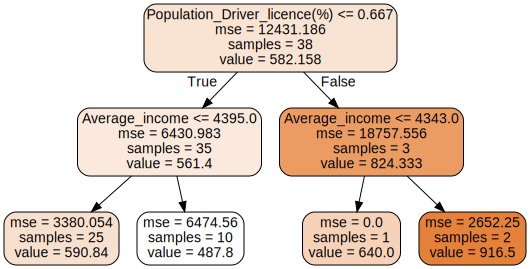

In [453]:
import graphviz
graphviz.Source(dot_data)

# Summary 

Using Decision Trees to build a regressor for the give data.

Mean Absolute Error      : 45.617999999999995

Mean Squared Error       : 3617.6406799999995

Root Mean Squared Error  : 60.14682601767112

R2-score                 : 0.67316805690946


# Tree Diagram Interpretation with their conditons


**The decision tree with max_depth 2 and all Features.

**The dataset with one target(Petrol_consumption) and four features('Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)')

**Now,By calculating the mean square error between two corresponding features with respetive to all combinations which have more information gain will considered as root for the Decison Tree.here, Population_Driver_licence <= 0.667 and mse 12431.186,samples 38,value 582.158.

**The root has 2 decision branches Average_income <= 4395.0,mse 6430.983,sample 35,value 561.4 and Average_income <= 4343.0,mse 18757.556,sample 3,value 824.323

**Decision branch  Average_income <= 4395.0 have 2 leaf nodes left and right with mse 3380.054,6474.56 ,sample 25,10,value 590.84,487.8.

**Decision branch  Average_income <= 4343.0 have 2 leaf nodes left and right mse 0.0,2652.25,samples 1,2 , values 640.0,916.5




We see that on the terminal nodes (i.e. leaves) the model outputs one of the four values for all the predictions. We can also confirm this with the below code by looking at the predicted unique values.

In [454]:
import numpy as np

In [455]:
np.unique(predictions)

array([487.8 , 590.84, 916.5 ])

Decision Trees on their own are very simple models, which do not provide as accurate predictions as some of the other models can. However, as we will see later, other models such as XGB, Random Forest etc. use Decision Trees to give highly accurate predictions.

We can also export the graph to other formats like png, pdf etc. by using pydotplus package.

In [456]:
from pydotplus import graph_from_dot_data

In [457]:
graph = graph_from_dot_data(dot_data)

In [458]:
graph.write_png("Regressor_tree.png")

True

#  Regression using Decision Tree with GridSearch and Cross-Validation


Import Decision Tree Regressor, and GridSearchCV and fit the model to the training data.


In [459]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Let's use GridSearchCV to try max_depth values 3,4,5,6,None and 1,2,3,4 value for max_features hyperparameters. Specify 10 number of folds.


In [587]:
param_grid = [{"max_depth":[3,4,5, 6, None], "max_features":[3,4]}]

Now using the decisionTreeRegression with randon value 999

In [643]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=93),\
                 param_grid = param_grid,\
                 cv=10)

Fit the training data

In [644]:
gs.fit(X_train, y_train)

/home/qolsys/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=93, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [3, 4, 5, 6, None], 'max_features': [3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Print out all the hyperparameters combinations that the GridSearchCV has tried.

In [645]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 6, 'max_features': 3},
 {'max_depth': 6, 'max_features': 4},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4}]

Print best hyperparameters combination

In [646]:
gs.best_params_

{'max_depth': 5, 'max_features': 4}

print the rank for all of the tried combinations.

In [647]:
gs.cv_results_['rank_test_score']

array([ 8,  5,  6,  2,  9,  1,  7,  3, 10,  4], dtype=int32)

Print the complete DecisionTree estimator.

In [648]:
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=93, splitter='best')

Make predictions for the test set.

In [649]:
predictions_1 = gs.predict(X_test)

Now let's compare some of our predicted values with the actual values and see how accurate 

In [650]:
df_1=pd.DataFrame({'Actual':y_test, 'Predicted':predictions_1})  
df_1 

,Actual,Predicted
43,591,642.250000
11,471,464.000000
5,457,504.000000
24,460,504.000000
7,467,504.000000
35,644,549.750000
40,587,529.666667
36,640,623.000000
44,782,865.000000
8,464,464.000000


Calculate accuracy of prediction

In [651]:
from sklearn.metrics import mean_absolute_error, r2_score
#mean_absolute_error(y_test, predictions_1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_1)))


Mean Absolute Error: 43.78333333333334
Mean Squared Error: 2753.7736111111117
Root Mean Squared Error: 52.47641004404848


In [652]:
r2_score(y_test, predictions)

0.67316805690946

First,we import graphviz from sklearn for tree diagram, we export the tree output to a dot format object.

In [653]:
from sklearn.tree import export_graphviz
dot_data_1 = export_graphviz(gs.best_estimator_, filled=True, rounded=True, feature_names=['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'], out_file=None)

Next, we use graphviz to plot the dot data as a decision tree.

In [654]:
import graphviz

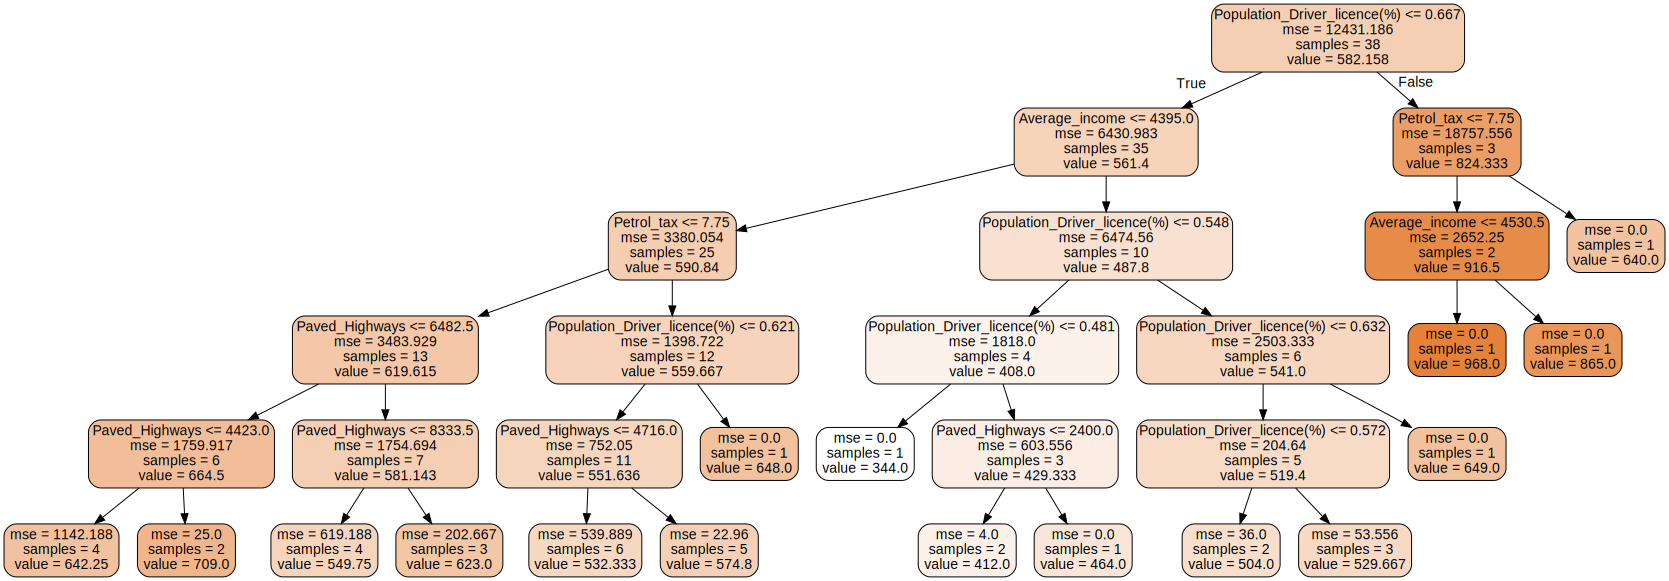

In [655]:
graphviz.Source(dot_data_1)

# Summary 

Using Decision Trees to build a regressor for the give data. Using Grid Search to find the optimal value for the hyperparameters, and evaluate your model on the appropriate metrics.

Mean Absolute Error      : 43.78333333333334

Mean Squared Error       : 2753.7736111111117

Root Mean Squared Error  : 52.47641004404848

R2 score                 : 0.67316805690946  

# Tree Diagram Interpretation with their conditons


**Decision tree using Hyperparamter conditions with max_depth[3,4,5,6,none] and max_features [3,4] gives the best fit depth and feature for future predictions.

**The best fit hyperparameter decision is max_depth 5 and all Features Max_features = 4 

**The dataset with one target(Petrol_consumption) and four features('Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)')

**Now,By calculating the mean square error between two corresponding features with respetive to all combinations which have more information gain will considered as root for the Decison Tree.here, Population_Driver_licence <= 0.667 and mse 12431.186,samples 38,value 582.158

**The Root of the tree takes a Boolean decision True and False as 2 decison brach nodes Average_income <=4395,mse 6430.98,samples 35,value 561.4 and Petrol_tax <=7.75,mse 18757.556,samples 3,value 824.333.

**The root branch with True decision Average_income is again divided into 2 decison branch nodes Petrol_tax <= 7.75 and Population_Driver_licence <= 0.548,mse <=6474.56,samples 10,value 487.8 which is again divided into Population_Driver_licence <= 0.481 and Population_Driver_licence <= 0.632 ,mse 2503.333,samples 6,value 541.0 which divides into one leaf node mse 0,sample 1,value 649 and decision brach Population_Driver_licence <= 0.572,mse 204.64,samples 5,value 519.4 having 2 leafs right and left with mse 36.0 ,53.55 ,samples 2,3 and value 504, 529.667.

**Decision branch of Population_Driver_licence <= 0.481,mse 1818,sample 4,value 408.0 which divides into one leaf on left mse 0,samples 1,values 344.0 and decison branch Paved_Highways <= 2400,mse 603.55,samples 3,values 429.33 with 2 leaf nodes left and right with mse 4.0,0.0,samples 2,1,values 412,464.

**Decison branch of Petrol_tax <=7.75 have 2 more decision branch Paved_Highways <= 6482.5 and Population_Driver_licence <= 0.621,mse 1398.322,sample 12,value 559.667 which divides into one leaf node on right with mse 0,samples 1,values 648.0 and left decision subclass Paved_Highways <= 4716.0,mse 752.05,samples 11,values 551.636 having 2 leaf nodes left and right with mse 539.88,22.96,samples 6,5,values 532.3,574.0.

**Decision brach Paved_Highways <= 6482.5 divides into 2 decison branch ledt Paved_Highways <= 4423.0,mse 1759.917,sample 6,value 664.5 divides into 2 lead nodes left and right with mse 1142.188,2.0 ,sample  4,2 ,values 642.25,709.0 and right decision branch Paved_Highways <= 8333.5,mse 1754.694,samples 7,value 581.147 with 2 leaf nodes left and right conditions mse 619.188,202.667,samples 4,3,values 549.75,623.0 .

**Lets now fron root Boolean false right Petrol_tax <= 7.75,mse 18757.55,sample 3,value 824.33 with this condition divides into right leaf node mse 0,sample 1,value 640.0 and ledt Decision brach Average_income <= 4530.5,mse 2652.25,sample 2,value 916.5 with this condition divided into last leaf node left and right mse 0,samples 1,1,values 968.0,865.0 . 








In [661]:
import numpy as np

In [662]:
np.unique(predictions_1)

array([464.        , 504.        , 529.66666667, 549.75      ,
       623.        , 642.25      , 865.        ])

We can also export the graph to other formats like png, pdf etc. by using pydotplus package.

In [663]:
from pydotplus import graph_from_dot_data

In [664]:
graph_1 = graph_from_dot_data(dot_data_1)

In [665]:
graph_1.write_png("regression_tree_1.png")

True

# Conclustion

Using Decision Tree for Regression We will use this dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

Decision tree with max_depth =2 :

Mean Absolute Error      :  45.617999999999995

Mean Squared Error       :  3617.6406799999995

Root Mean Squared Error  :  60.14682601767112

R2-score                 :  0.67316805690946

using hyperparamater with max_depth=5 and max_features = 4 :

Mean Absolute Error      : 43.78333333333334

Mean Squared Error       : 2753.7736111111117

Root Mean Squared Error  : 52.47641004404848

R2 score                 : 0.67316805690946  

# observation :

From obeservation we see that Mean Squared Error of depth = 2 is 3617.64 and using hyperparameter value 2753.77 there is a decrease in mean square error.

After and before hyperparamater usage R2 score is equal 67.3%

Mean Absolute Error is also decreased in hyperparamater and got good predictions score with hyperparameter with decrease in Mean Absolute Error ,Mean Squared Error,Root Mean Squared Error.

Finally using GridSearch and hyperparameter we can cross validate our model and get best model .